# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Univariate Analysis

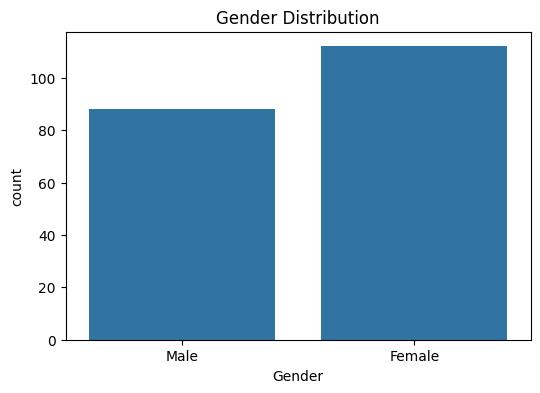

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x=data["Gender"])
plt.title("Gender Distribution")
plt.show()

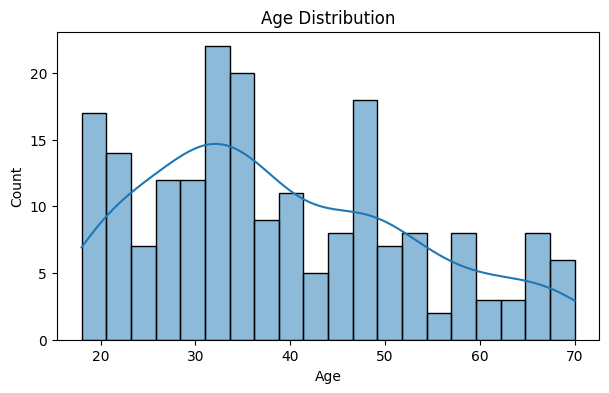

In [8]:
plt.figure(figsize=(7,4))
sns.histplot(data["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

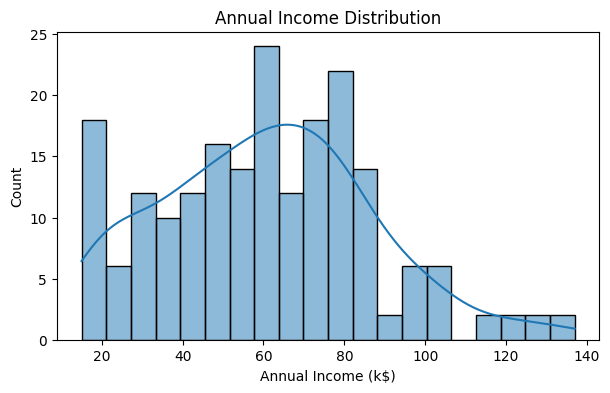

In [15]:
plt.figure(figsize=(7,4))
sns.histplot(data["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Bivariate Analysis

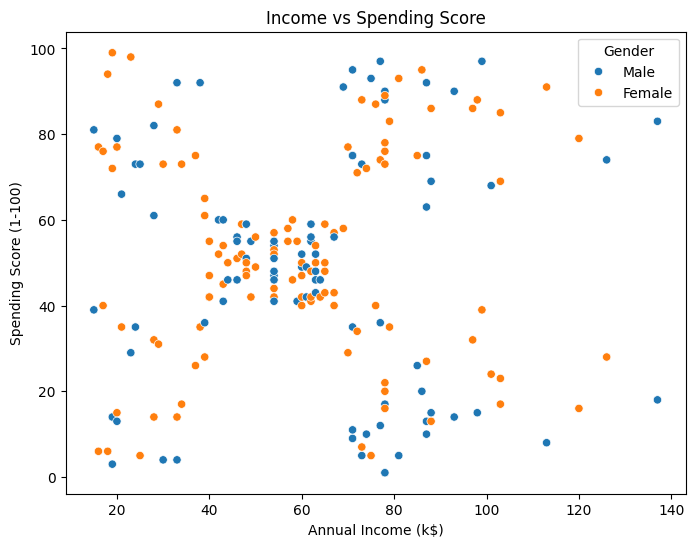

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender'
)
plt.title("Income vs Spending Score")
plt.show()

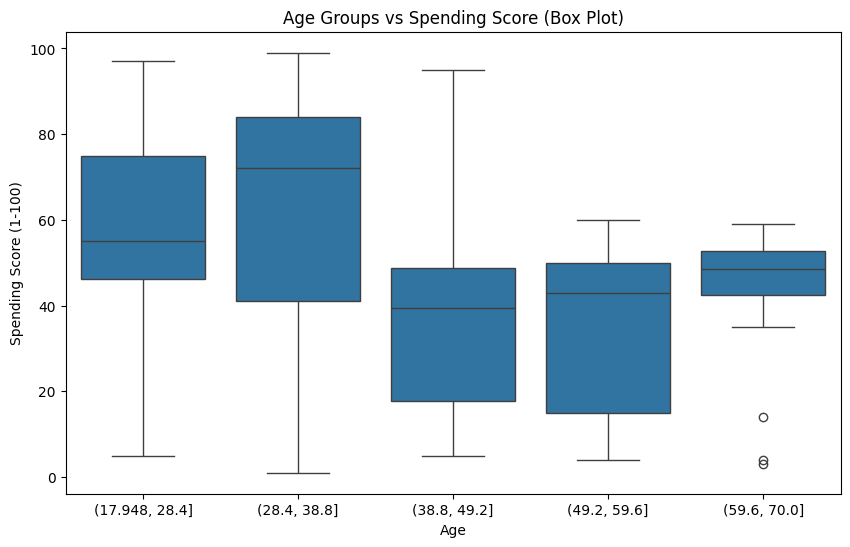

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x=pd.cut(data['Age'], bins=5), y='Spending Score (1-100)')
plt.title("Age Groups vs Spending Score (Box Plot)")
plt.show()


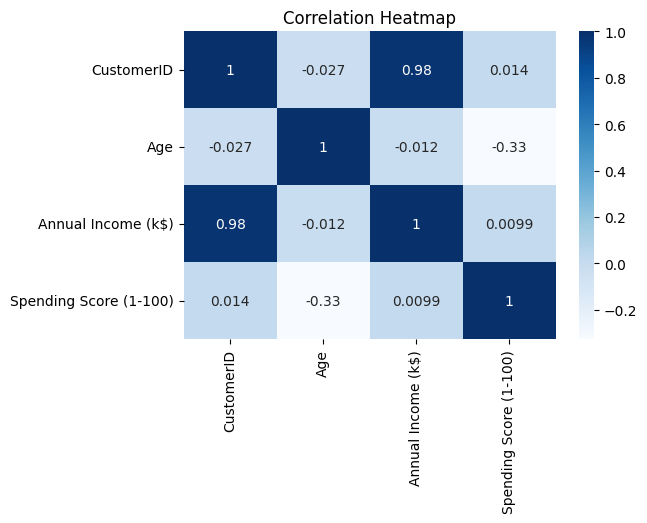

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection for **Clustering**

In [33]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method (Finding Best k)

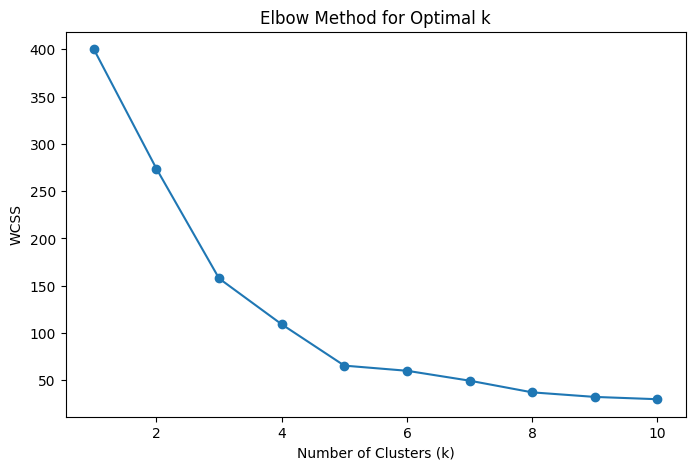

In [35]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()